In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [13]:
def MyLinearRegression(dataframe: np.ndarray[np.ndarray[float]]):
    count_pontos = len(dataframe) # Pontos que devem ser melhor ajustados ao modelo
    count_features = len(dataframe[0]) - 1 # Último elemento é o y
    
    X = np.ones(shape=(count_pontos, count_features + 1))
    Y = np.zeros(shape=(count_pontos, 1))

    for i in range(count_pontos):
        pontos = dataframe[i]
        X[i][1:] = pontos[:count_features] # Todo: Features devem ser elevadas a K
        Y[i] = pontos[count_features]

    result = np.dot(X.T, X)
    result = np.linalg.inv(result)
    result = np.dot(result, X.T)
    result = np.dot(result, Y)
    return result

[[-1.61904762]
 [ 2.02380952]]


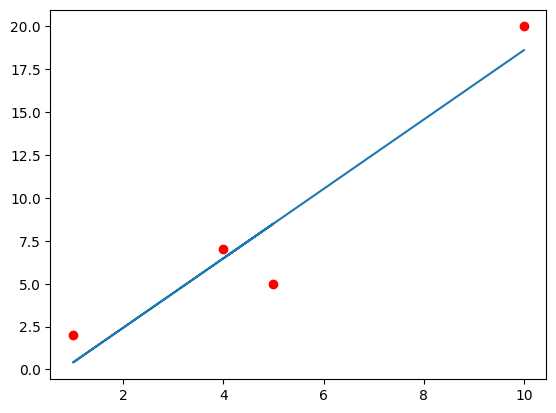

In [14]:
teste = np.array([
    [10, 20],
    [1, 2],
    [5, 5],
    [4, 7],
])

a = []
b_real = []
for x, y in teste:
    a.append(x)
    b_real.append(y)

result = MyLinearRegression(teste)
print(result)

a = []
b_previsto = []
for x, y in teste:
    a.append(x)
    y_til = result[0] + result[1] * x
    b_previsto.append(y_til[0])
plt.plot(a, b_real, 'ro', a, b_previsto)
plt.show()

In [3]:
def MyLinearRegression(dataframe: np.ndarray[np.ndarray[float]]):
    count_pontos = len(dataframe) # Pontos que devem ser melhor ajustados ao modelo
    count_features = len(dataframe[0]) - 1 # Último elemento é o y
    
    X = np.ones(shape=(count_pontos, count_features + 1))
    Y = np.zeros(shape=(count_pontos, 1))

    for i in range(count_pontos):
        pontos = dataframe[i]
        X[i][1:] = pontos[:count_features] # Todo: Features devem ser elevadas a K
        Y[i] = pontos[count_features]

    result = np.dot(X.T, X)
    result = np.linalg.inv(result)
    result = np.dot(result, X.T)
    result = np.dot(result, Y)

    rss = 0
    for i in range(count_pontos):
        y_real = Y[i]
        y_estimado = result[0] + result[1] * X[i][1] # Todo: Generalizar para multivariáveis
        rss += math.pow(y_real - y_estimado, 2)
    
    rse = math.sqrt(rss / (count_pontos - 2))

    return [result, rss, rse]

[[-1.61904762]
 [ 2.02380952]]


16.976190476190467


2.913433582235098


C:\Users\Diego\AppData\Local\Temp\ipykernel_13960\3036989352.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rss += math.pow(y_real - y_estimado, 2)


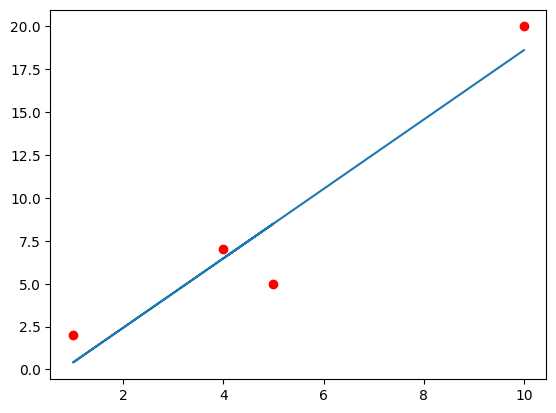

In [4]:
teste = np.array([
    [10, 20],
    [1, 2],
    [5, 5],
    [4, 7],
])

a = []
b_real = []
for x, y in teste:
    a.append(x)
    b_real.append(y)

result, rss, rse = MyLinearRegression(teste)
print(result)
print("\n")
print(rss)
print("\n")
print(rse)

a = []
b_previsto = []
for x, y in teste:
    a.append(x)
    y_til = result[0] + result[1] * x
    b_previsto.append(y_til[0])
plt.plot(a, b_real, 'ro', a, b_previsto)
plt.show()